## **Breast Cancer Prediction Web Application**

>“Early detection saves lives. This tool aims to assist in the timely diagnosis of breast cancer.”

> “Artificial Intelligence is not a replacement for medical professionals, but a tool to support them.”

### **Introduction**

Breast cancer is one of the most common cancers affecting women worldwide. Early detection is crucial for effective treatment and improved survival rates. This project leverages



### **Features**

- **Upload Mode:** Upload an image from your computer for prediction.
- **Camera Mode:** Capture a live image using your device’s camera.
- **Prediction Results:** Classifies images as “Cancer” or “Non-Cancer”.
- **User Interface:** Responsive and intuitive design with animation effects.



### **How It Works**

1. **Image Input:** Users can upload or capture an image.
2. **Prediction:** The backend processes the image using a trained deep learning model.
3. **Result Display:** The prediction result is shown along with the image.

---

In [1]:
# Importing Some Necessery Library
import numpy as np
import seaborn as sns
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [2]:
pip install gdown


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Attempting to download https://drive.google.com/uc?id=1gJPfn9R-la0-NmB2W-4CjJwxciFA4XHO to /content\1gJPfn9R-la0-NmB2W-4CjJwxciFA4XHO.zip


Downloading...
From (original): https://drive.google.com/uc?id=1gJPfn9R-la0-NmB2W-4CjJwxciFA4XHO
From (redirected): https://drive.google.com/uc?id=1gJPfn9R-la0-NmB2W-4CjJwxciFA4XHO&confirm=t&uuid=7e9d59cd-f74d-43d6-9ccd-46c54bf6d98e
To: c:\content\1gJPfn9R-la0-NmB2W-4CjJwxciFA4XHO.zip
100%|██████████| 138M/138M [00:05<00:00, 23.1MB/s] 


Extracting /content\1gJPfn9R-la0-NmB2W-4CjJwxciFA4XHO.zip
Attempting to download https://drive.google.com/uc?id=1AmqCHulGX-D9WarTF9BmGvoXuWbL9lF_ to /content\1AmqCHulGX-D9WarTF9BmGvoXuWbL9lF_.zip


Downloading...
From (original): https://drive.google.com/uc?id=1AmqCHulGX-D9WarTF9BmGvoXuWbL9lF_
From (redirected): https://drive.google.com/uc?id=1AmqCHulGX-D9WarTF9BmGvoXuWbL9lF_&confirm=t&uuid=8c0d6813-e940-446c-8868-f439f851762b
To: c:\content\1AmqCHulGX-D9WarTF9BmGvoXuWbL9lF_.zip
100%|██████████| 661M/661M [00:21<00:00, 30.3MB/s] 


Extracting /content\1AmqCHulGX-D9WarTF9BmGvoXuWbL9lF_.zip


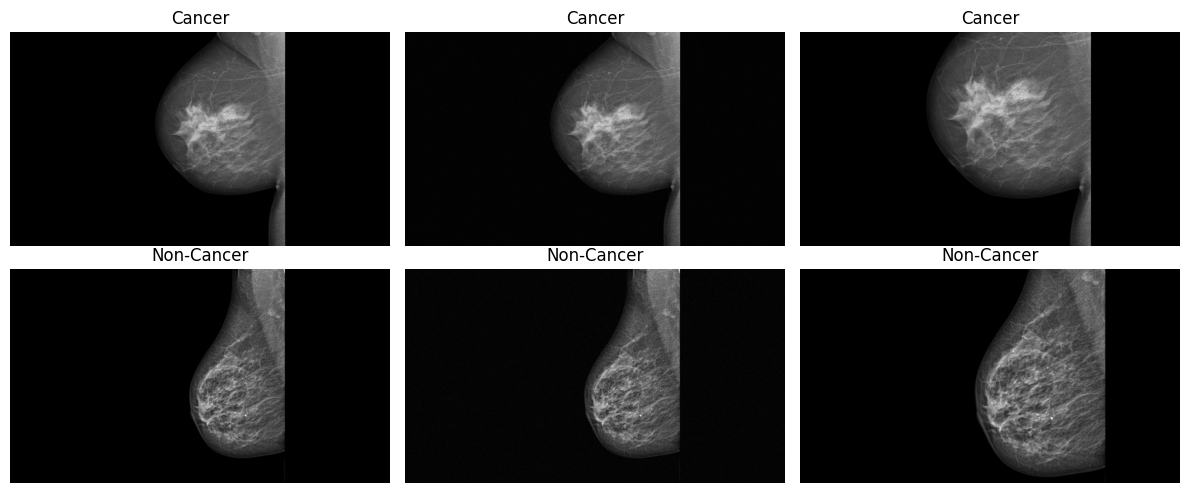

In [3]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import zipfile
import gdown
import time

# Google Drive file URLs (view links)
zip_files_urls = [
    "https://drive.google.com/file/d/1gJPfn9R-la0-NmB2W-4CjJwxciFA4XHOp/view?usp=sharing",
    "https://drive.google.com/file/d/1AmqCHulGX-D9WarTF9BmGvoXuWbL9lF_p/view?usp=sharing"
]

extract_path = "/content/images_dataset"
os.makedirs(extract_path, exist_ok=True)

# Download and extract each zip file
for url in zip_files_urls:
    try:
        # Extract file ID from Google Drive URL
        if "/file/d/" in url:
            file_id = url.split("/file/d/")[1].split("/")[0]
        else:
            print(f"Invalid Google Drive URL format: {url}")
            continue

        output_path = os.path.join("/content", file_id + ".zip")
        download_url = f'https://drive.google.com/uc?id={file_id}'

        print(f"Attempting to download {download_url} to {output_path}")
        gdown.download(download_url, output_path, quiet=False)
        time.sleep(1)

        if not os.path.exists(output_path) or os.path.getsize(output_path) < 1000:
            print(f"Warning: Downloaded file {output_path} is too small or does not exist.")
            continue

        print(f"Extracting {output_path}")
        with zipfile.ZipFile(output_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

        os.remove(output_path)

    except Exception as e:
        print(f"An error occurred while processing {url}: {e}")
        if os.path.exists(output_path):
            print(f"Attempting to remove potentially problematic file: {output_path}")
            os.remove(output_path)
        continue

# Categories of images
categories = ["Cancer", "Non-Cancer"]

# Store image paths
category_images = {}
for category in categories:
    category_dir = os.path.join(extract_path, category)
    if os.path.exists(category_dir):
        category_images[category] = [
            os.path.join(category_dir, file)
            for file in os.listdir(category_dir)
            if file.lower().endswith((".jpg", ".png"))
        ]
    else:
        print(f"Warning: Directory {category_dir} not found after extraction.")
        category_images[category] = []

# Display first 3 images from each category
plt.figure(figsize=(12, 5))
display_count = 3
for i, category in enumerate(categories):
    images_to_display = category_images[category][:display_count]
    for j, image_path in enumerate(images_to_display):
        plt.subplot(len(categories), display_count, i * display_count + j + 1)
        try:
            img = load_img(image_path)
            plt.imshow(img_to_array(img) / 255.0)
            plt.title(category)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            continue

plt.tight_layout()
plt.show()


##### Counting the total Image

In [4]:
total_image_count = 0
categories = ["Cancer", "Non-Cancer"]
for category in categories:
    folder_path = os.path.join(extract_path, category)
    # Check if the directory exists before trying to list its contents
    if os.path.exists(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith((".jpg", ".JPG", ".PNG", ".png")):
                total_image_count += 1
    else:
        print(f"Warning: Directory {folder_path} not found. Skipping count for this category.")
print("Total number of images:", total_image_count)

Total number of images: 9685


### Load and Preprocess All Images

This includes:

Resizing

Normalizing

Label encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


image_size = (128, 128)
images = []
labels = []

# Use the category_images dictionary created in the previous cell
# categories and extract_path are available from previous execution
categories = ["Cancer", "Non-Cancer"] # This is already defined and populated
# extract_path = "/content/images_dataset" # This is already defined

print(f"\nLoading and preprocessing images from categories: {categories}")

processed_count = 0
added_count = 0

for category in categories:
    category_dir = os.path.join(extract_path, category)
    print(f"Processing category: {category}")
    # Check if the directory exists before listing files
    if os.path.exists(category_dir):
        # Iterate through all files in the directory, including augmented ones
        for file_name in os.listdir(category_dir):
            # Only process image files
            if file_name.lower().endswith((".jpg", ".png")):
                image_path = os.path.join(category_dir, file_name)
                processed_count += 1
                try:
                    img = load_img(image_path, target_size=image_size)
                    img_array = img_to_array(img) / 255.0  # Normalize pixel values
                    images.append(img_array)
                    labels.append(category)
                    added_count += 1
                    # print(f"Added image: {image_path} with category: {category}") # Uncomment for detailed logging
                except FileNotFoundError:
                    print(f"Error: Image file not found at {image_path} during loading.")
                except Exception as e:
                     print(f"Error loading image {image_path}: {e}")
    else:
        print(f"Warning: Directory {category_dir} not found. Skipping loading for this category.")


print(f"\nTotal image files processed: {processed_count}")
print(f"Images and labels successfully added: {added_count}")

# Convert to numpy arrays
X = np.array(images)
le = LabelEncoder()

if len(labels) > 0:
    y = le.fit_transform(labels)  # Converts categories to numerical labels
    # Verify the mapping of encoded labels back to category names
    print("\nEncoded labels mapping:")
    for i, label in enumerate(le.classes_):
        print(f"{label}: {i}")

    print("\nShape of X:", X.shape)
    print("Shape of y:", y.shape)
else:
    print("\nNo images were successfully loaded and matched to a category. X and y are empty.")
    print("Shape of X:", X.shape)
    print("Shape of y: (empty)") # Indicate y is empty


Loading and preprocessing images from categories: ['Cancer', 'Non-Cancer']
Processing category: Cancer
Processing category: Non-Cancer

Total image files processed: 9685
Images and labels successfully added: 9685

Encoded labels mapping:
Cancer: 0
Non-Cancer: 1

Shape of X: (9685, 128, 128, 3)
Shape of y: (9685,)


### Splitting into training and Testing

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Assuming X has shape (num_samples, 128, 128, 3) and y has shape (num_samples,)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Assuming X_train has less than 100 samples
# Adjust the split to prevent an empty X_train
validation_size = min(100, int(0.2 * len(X_train))) # validation size to be 20% of X_train but not exceeding 100

# break training set into training and validation sets
(X_train, X_valid) = X_train[validation_size:], X_train[:validation_size]
(y_train, y_valid) = y_train[validation_size:], y_train[:validation_size]


# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

#from keras.utils import np_utils
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to your original labels (y)
label_encoder.fit(y)

# Transform the labels in y_train, y_test, and y_valid to numerical values
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
y_valid = label_encoder.transform(y_valid)

# one-hot encode the labels
num_classes = len(np.unique(y)) # Calculate total number of classes from original labels (y)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes) # One-hot encode y_valid as well

x_train shape: (7648, 128, 128, 3)
7648 train samples
1937 test samples
100 validation samples


In [8]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("y_valid:", y_valid.shape)
print("Number of classes:", num_classes)

X_train: (7648, 128, 128, 3)
y_train: (7648, 2)
X_valid: (100, 128, 128, 3)
y_valid: (100, 2)
Number of classes: 2


#### Define the Model Architecture

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',input_shape=(128, 128, 3))) # Changed input shape to (128, 128, 3)
#16 filters with 2X2 kernel with padding size same as iput and output
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Flatten())# Coverting data into 1D array
model.add(Dense(700, activation='relu'))#500 nurons with relu AF
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax')) # Changed output to 2 for 2 classes

model.summary()

C:\Users\satya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpointer, early_stop],
    verbose=1,
    shuffle=True
)


Epoch 1/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.8529 - loss: 0.3768
Epoch 1: val_loss improved from inf to 0.15529, saving model to model.weights.best.keras
239/239 ━━━━━━━━━━━━━━━━━━━━ 236s 969ms/step - accuracy: 0.8531 - loss: 0.3764 - val_accuracy: 0.9400 - val_loss: 0.1553
Epoch 2/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - accuracy: 0.9434 - loss: 0.1647
Epoch 2: val_loss improved from 0.15529 to 0.09444, saving model to model.weights.best.keras
239/239 ━━━━━━━━━━━━━━━━━━━━ 254s 937ms/step - accuracy: 0.9434 - loss: 0.1647 - val_accuracy: 0.9700 - val_loss: 0.0944
Epoch 3/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - accuracy: 0.9631 - loss: 0.1149
Epoch 3: val_loss improved from 0.09444 to 0.04273, saving model to model.weights.best.keras
239/239 ━━━━━━━━━━━━━━━━━━━━ 214s 893ms/step - accuracy: 0.9631 - loss: 0.1148 - val_accuracy: 0.9900 - val_loss: 0.0427
Epoch 4/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.9813 - loss: 0.0553
Epoch 4: v

### Load the Model with the Best Validation Accuracy

In [12]:
model.load_weights('model.weights.best.keras')

### Visualize Some Predictions

In [13]:
# get predictions on the test set
y_hat = model.predict(X_test)

cifar10_labels = ["Cancer", "Non-Cancer"]

61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step


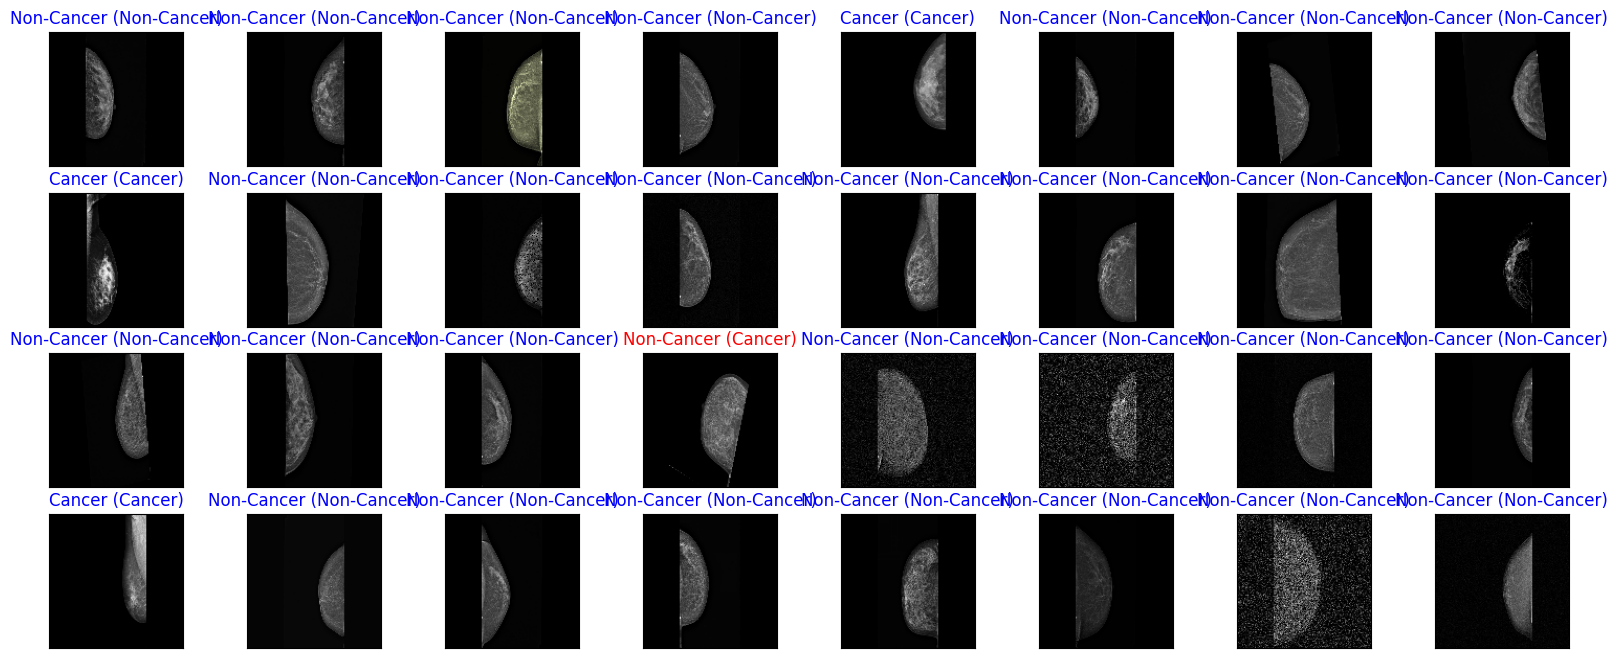

In [14]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
# Get the number of samples in x_test
num_samples = X_test.shape[0]

# Ensure 'size' is less than or equal to the number of samples in x_test
sample_size = min(num_samples, 32)

for i, idx in enumerate(np.random.choice(num_samples, size=sample_size, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [15]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.7801%
